# Root Questions - Modal clauseType

In this Notebook, I look at the breakdown of verbs in each kind of questions to understand better the semantic content of different types of questions.

For each wh-question type, I look first at emb_verb, the code for the first verb in the question, then v2_after, and then mat_verb. 

In [1]:
from __future__ import division
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
import numpy as np
import re

In [2]:
df = pd.read_json("final_corpus.json")

In [3]:
len(df)

427079

In [4]:
# # Remove the Brown corpus
df = df[df.corpus != "brown"]

In [5]:
len(df) #422983

422983

In [6]:
df['emb_verb'] = df['emb_verb'].replace({'Can': 'can', 'CAN': 'can', 'WILL': 'will', 'Will': 'will', 'Could': 'could', 'Would':'would', 'Should': 'should'})
df['v1_after'] = df['v1_after'].replace({'Can': 'can', 'CAN': 'can', 'WILL': 'will', 'Will': 'will', 'Could': 'could', 'Would':'would', 'Should': 'should'})

In [7]:
root = df[df.questType == "Root Question"]

In [8]:
# This makes the display show more info
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [9]:
mod = root[root.clauseType == "Modal"]

In [10]:
# mod.sentence

## C. Modal

In [ ]:
mod['v1_after'].value_counts()

In [17]:
mod.pivot_table(index=['questType', 'wh', 'emb_verb'], values='sentence', aggfunc=len).groupby(['questType', 'wh']).sentence.transform(lambda x: x/sum(x))

questType         wh     emb_verb
Embeded Question  how    can         0.363705
                         could       0.172135
                         may         0.030035
                         might       0.045684
                         must        0.028016
                         shall       0.007067
                         should      0.062342
                         will        0.107269
                         would       0.183746
                  where  can         0.269175
                         could       0.146165
                         may         0.047757
                         might       0.059334
                         must        0.028944
                         shall       0.013025
                         should      0.096961
                         will        0.144718
                         would       0.193922
                  who    can         0.152824
                         could       0.112957
                         may         0.039867


In [13]:
mod_who = mod.loc[mod.wh.isin(["who"])]
mod_where = mod.loc[mod.wh.isin(["where"])]
mod_how = mod.loc[mod.wh.isin(["how"])]

# C1. Modal-How

In [14]:
m_how_vs_count = mod_how.groupby(["emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False).reset_index()

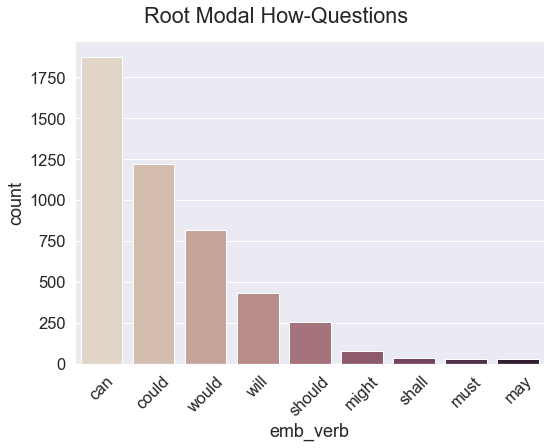

In [15]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", data=m_how_vs_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Root Modal How-Questions')
g.set_xticklabels(rotation=45)

plt.show()

# v2_after

In [33]:
# mirst filter so its not a super long list. We want to see the most mrequent ones.
m_how_v2s = mod_how.groupby('v2_after').filter(lambda x: len(x) >= 150)
m_how_vs_v2_count = m_how_v2s.groupby(["emb_verb","v2_after"])["v2_after"].count().reset_index(name='count').sort_values(['count'], ascending=False)
# then look at the counts mor those most mrequent verbs
m_how_v2s.groupby(['emb_verb','v2_after'])['v2_after'].count()

emb_verb  v2_after
can       be          364
          get         74 
          have        50 
          know        23 
could     be          176
          get         18 
          have        203
          know        29 
may       be          5  
          have        1  
might     be          18 
          have        11 
must      be          16 
          get         1  
          have        2  
shall     be          4  
          get         2  
          have        2  
          know        1  
should    be          66 
          get         8  
          have        5  
          know        48 
will      be          113
          get         22 
          have        18 
          know        22 
would     be          108
          get         52 
          have        71 
          know        49 
Name: v2_after, dtype: int64

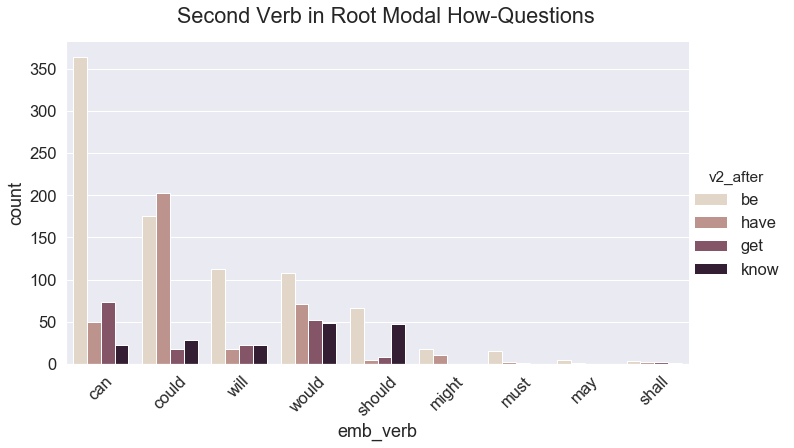

In [38]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count",hue="v2_after", kind="bar", data=m_how_vs_v2_count, palette="ch:.25", height=6, aspect=10/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Second Verb in Root Modal How-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [46]:
m_how_v2s.loc[m_how_v2s.emb_verb == "must"].sentence

43598     How bitter must he be to find himself in the position in which he was now?                                                                                                                                                                                    
78532     How far must he have flown in each hour?                                                                                                                                                                                                                      
98411     How much worse must the recollection be for Barney, who had seen the hideous reality?                                                                                                                                                                         
105403    How many of the hundreds of thousands of cells in each tiny brain region must one study to get a representative picture?                                                                           

# C2. Modal-Where

In [47]:
m_where_vs_count = mod_where.groupby(["emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False).reset_index()

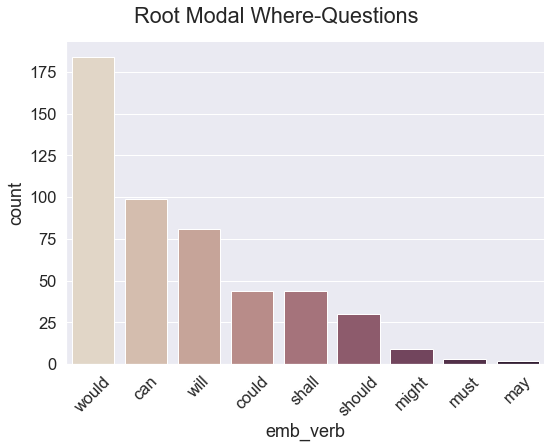

In [17]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", data=m_where_vs_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Root Modal Where-Questions')
g.set_xticklabels(rotation=45)

plt.show()

# v2_after

In [48]:
# mirst filter so its not a super long list. We want to see the most mrequent ones.
m_where_v2s = mod_where.groupby('v2_after').filter(lambda x: len(x) >= 20)
m_where_vs_v2_count = m_where_v2s.groupby(["emb_verb","v2_after"])["v2_after"].count().reset_index(name='count').sort_values(['count'], ascending=False)
# then look at the counts mor those most mrequent verbs
m_where_v2s.groupby(['emb_verb','v2_after'])['v2_after'].count()

emb_verb  v2_after
can       be          6 
          find        24
          get         20
          go          9 
          have        4 
          put         4 
could     be          9 
          find        3 
          get         1 
          go          11
          have        6 
          put         1 
might     be          2 
          find        1 
          have        2 
must      be          1 
          go          2 
shall     find        1 
          go          10
          put         13
should    be          3 
          go          3 
          have        3 
          put         4 
will      be          16
          find        4 
          get         3 
          go          17
          have        1 
          put         3 
would     be          36
          find        16
          get         10
          go          29
          have        14
          put         5 
Name: v2_after, dtype: int64

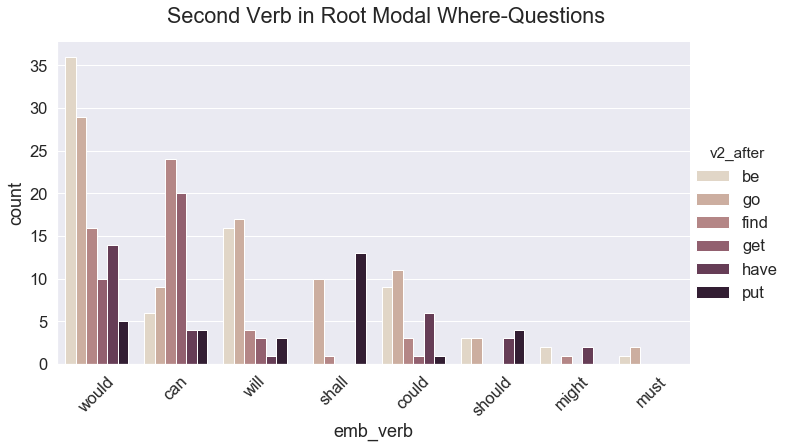

In [49]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count",hue="v2_after", kind="bar", data=m_where_vs_v2_count, palette="ch:.25", height=6, aspect=10/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Second Verb in Root Modal Where-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [56]:
m_where_v2s.loc[m_where_v2s.emb_verb == "may"].sentence

Series([], Name: sentence, dtype: object)

# C3. Modal-Who

In [57]:
m_who_vs_count = mod_who.groupby(["emb_verb"])["emb_verb"].count().reset_index(name='count').sort_values(['count'], ascending=False).reset_index()

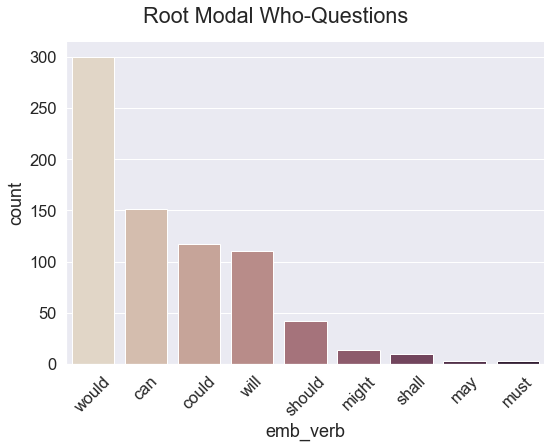

In [19]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count", kind="bar", data=m_who_vs_count, palette="ch:.25", height=6, aspect=8/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Root Modal Who-Questions')
g.set_xticklabels(rotation=45)

plt.show()

# v2_after

In [58]:
# mirst filter so its not a super long list. We want to see the most mrequent ones.
m_who_v2s = mod_who.groupby('v2_after').filter(lambda x: len(x) >= 20)
m_who_vs_v2_count = m_who_v2s.groupby(["emb_verb","v2_after"])["v2_after"].count().reset_index(name='count').sort_values(['count'], ascending=False)
# then look at the counts mor those most mrequent verbs
m_who_v2s.groupby(['emb_verb','v2_after'])['v2_after'].count()

emb_verb  v2_after
can       be          15
          have        2 
          say         16
          tell        9 
could     be          24
          have        17
          say         5 
          tell        11
          want        2 
might     be          5 
          say         1 
          want        2 
must      be          1 
shall     have        1 
          say         1 
          tell        1 
should    be          8 
          have        1 
will      be          25
          have        1 
          tell        1 
would     be          33
          have        70
          say         3 
          tell        1 
          want        24
Name: v2_after, dtype: int64

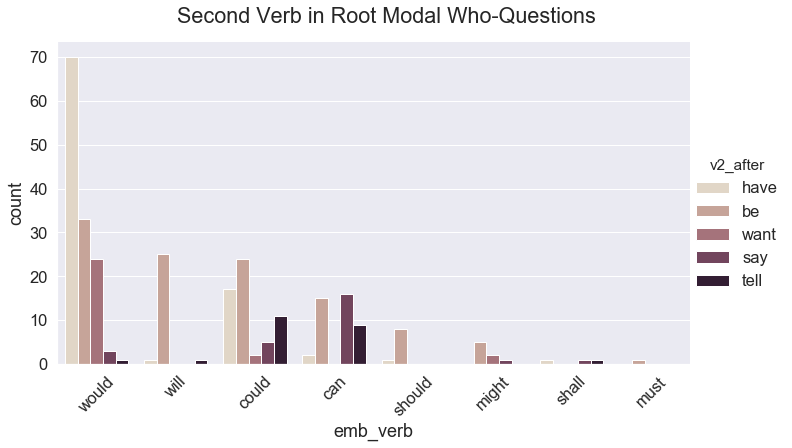

In [59]:
sns.set(font_scale=1.5)
g = sns.catplot(x="emb_verb", y="count",hue="v2_after", kind="bar", data=m_who_vs_v2_count, palette="ch:.25", height=6, aspect=10/6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Second Verb in Root Modal Who-Questions')
g.set_xticklabels(rotation=45)

plt.show()

In [71]:
m_who_v2s.loc[m_who_v2s.emb_verb == "shall"].sentence

122666    Who shall I tell him called?’                                                     
261458     "Who shall say what the Soviet Union has been to us?" , wrote Andre Gide in 1936.
317790    Who shall we have over for dinner?                                                
Name: sentence, dtype: object